In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu, ks_2samp

sns.set(style="whitegrid")
mpl.rcParams['lines.markeredgewidth']=0.5
mpl.rcParams['lines.markersize']=7

df = pd.read_csv('amazon.csv', encoding='latin-1')

# drop date column
df.drop('date', axis=1, inplace=True)

df.year = df.year.astype(int)

df.head()

,year,state,month,number
0,1998,Acre,Janeiro,0.0
1,1999,Acre,Janeiro,0.0
2,2000,Acre,Janeiro,0.0
3,2001,Acre,Janeiro,0.0
4,2002,Acre,Janeiro,0.0


In [2]:
# check for missing values
if any(df.isna().sum()) != 0:
    print("Has missing values.")

# translate month names into English
port_to_eng = {'Janeiro': 'January',
               'Fevereiro': 'February',
               'Março': 'March',
               'Abril': 'April',
               'Maio': 'May',
               'Junho': 'June',
               'Julho': 'July',
               'Agosto': 'August',
               'Setembro': 'September',
               'Outubro': 'October',
               'Novembro': 'November',
               'Dezembro': 'December'}

# look only at states that comprise the Legal Amazon:
# Acre, Amapa, Pará, Amazonas, Rondonia, Roraima, Mato Grosso, Tocantins and Maranhao

legal_amazon = ['Acre', 'Amapa', 'Pará',
                'Amazonas', 'Rondonia',
                'Roraima', 'Mato Grosso',
                'Tocantins', 'Maranhao']

df.replace({'month': port_to_eng}, inplace=True)
df_amazon = df[df.state.isin(legal_amazon)]
df_other = df[~df.state.isin(legal_amazon)]

In [3]:
def get_boxenplot(df, y_var):
    fig, ax = plt.subplots(figsize=(14,12))

    sns.boxenplot(x='number', y=y_var,
                  data=df, orient="h",
                  saturation=0.6,
                  palette="summer",
                  ax=ax)

    sns.despine(fig, ax)

    for l in ax.get_lines():
        l.set_color('white')

    for i in ax.collections:
        i.set_ec('white')
        i.set_linewidth(0.7)

## Data Analysis: Month
### Legal Amazon Region

In [4]:
# average number of fires in the Legal Amazon Region per month in descending order
num_by_month = df_amazon[['month', 'number']].groupby('month').mean()
num_by_month.reset_index(inplace=True)
num_by_month.sort_values('number', ascending=False).style

,month,number
5,July,198.257405
10,October,196.566145
9,November,179.576560
6,June,147.978375
4,January,138.169220
2,December,120.488311
8,May,97.986815
1,August,97.565565
7,March,88.607025
3,February,88.040250


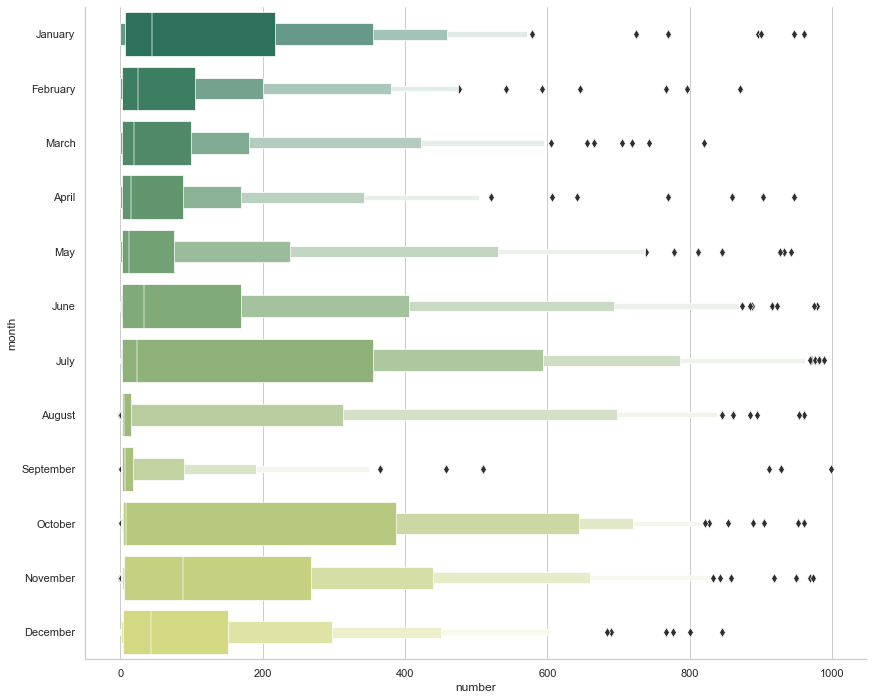

In [5]:
get_boxenplot(df_amazon, 'month')

From the data, we see that on average from 1998 to 2017, the Legal Amazon region had the most fires during July and the least in September.

The boxenplot, or letter-value plot provides further details. All of the months have medians smaller than their means, which indicates that their data is positively skewed. October is particularly extreme, having the second largest mean of the 12 months and the third smallest median. This suggests that from 1998 to 2017, the vast majority of fires in the Legal Amazon region occurred in relatively small numbers each month.

The boxes give us some insight into the distribution of the data. July has a smaller interquartile range than October, but has a larger range and a few closely clustered outliers near the end of the 97.5 percentile mark. This may suggest that July has higher variance than October, especially as frequency of fire increases. 

September has a very small range of values, three outliers not very far from the 97.5 percentile mark and three outliers that are extremely far from it. January, February and April show a similar distribution of data. It may be helpful to analyse these outliers.

In [6]:
# three largest values for September
df_amazon[df_amazon.month == 'September'].sort_values('number', ascending=False).head(3).style

,year,state,month,number
888,2008,Amazonas,September,998.000000
882,2002,Amazonas,September,928.000000
884,2004,Amazonas,September,911.000000


In [7]:
# three largest values for January
df_amazon[df_amazon.month == 'January'].sort_values('number', ascending=False).head(3).style

,year,state,month,number
2408,2015,Mato Grosso,January,960.000000
2399,2006,Mato Grosso,January,947.000000
3113,2003,Pará,January,900.000000


In [8]:
# three largest values for February
df_amazon[df_amazon.month == 'February'].sort_values('number', ascending=False).head(3).style

,year,state,month,number
2418,2005,Mato Grosso,February,871.000000
5288,2007,Roraima,February,796.000000
5284,2003,Roraima,February,767.000000


In [9]:
# three largest values for April
df_amazon[df_amazon.month == 'April'].sort_values('number', ascending=False).head(3).style

,year,state,month,number
2468,2015,Mato Grosso,April,947.000000
2456,2003,Mato Grosso,April,903.000000
2467,2014,Mato Grosso,April,859.000000


The 6 of the 9 outliers for January, February and April occurred in Mato Grosso in 2003, 2005, 2006 2014 and 2015. 2015 in particular seems to have been bad, with very high frequencies of fires in January and April. 

All 3 outliers for September occurred in Amazonas in 2002, 2004 and 2008.

### The Rest of Brazil

In [10]:
# average number of fires in the rest of Brazil per month in descending order
num_by_month = df_other[['month', 'number']].groupby('month').mean()
num_by_month.reset_index(inplace=True)
num_by_month.sort_values('number', ascending=False).style

,month,number
1,August,201.580359
5,July,154.925388
9,November,145.861006
10,October,145.201029
11,September,143.702647
2,December,107.252944
6,June,77.691176
4,January,58.985337
8,May,44.511765
3,February,38.941176


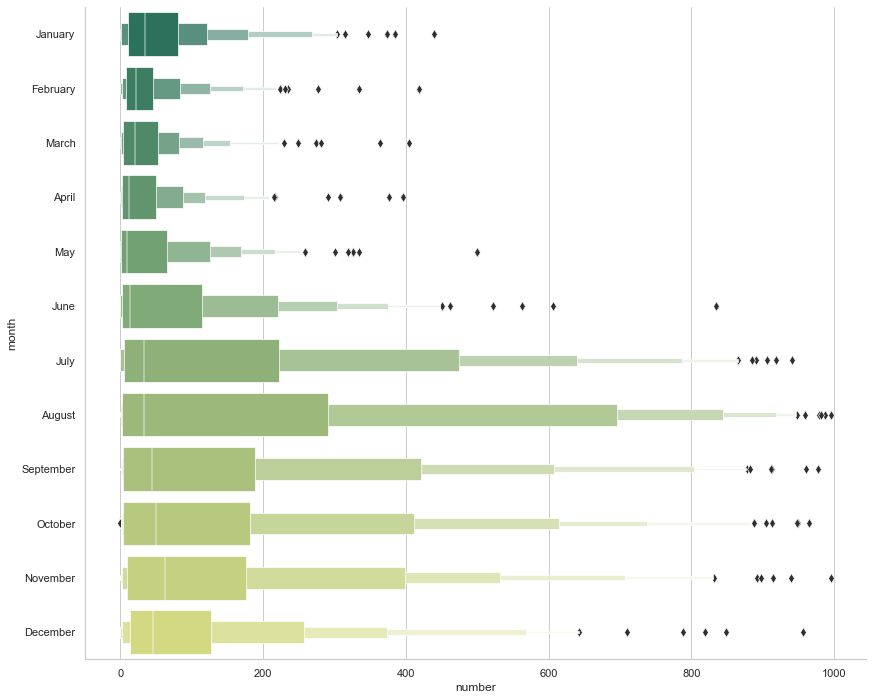

In [11]:
get_boxenplot(df_other, 'month')

From the data, we see that on average from 1998 to 2017, the rest of Brazil had the most fires in August and the least in April. Except for August, the rest of Brazil appears to have less fires per month than the Legal Amazon region.

The letter-value plot provides further details. All of the months have medians smaller than their means, which indicates that their data is positively skewed. The boxes however do indicate that the medians are proportionately much closer in value to the means for this data than the in the earlier data for the Legal Amazon Region. This suggests that the skew is less extreme.

## Data Analysis: States
### Legal Amazon  Region

In [12]:
# average number of fires by state in the Legal Amazon Region in descending order
num_by_state = df_amazon[['state', 'number']].groupby('state').mean()
num_by_state.reset_index(inplace=True)
num_by_state.sort_values('number', ascending=False).style

,state,number
4,Mato Grosso,201.351523
8,Tocantins,141.037176
2,Amazonas,128.243218
3,Maranhao,105.142808
5,Pará,102.561272
7,Roraima,102.029598
1,Amapa,91.345506
6,Rondonia,84.876272
0,Acre,77.255356


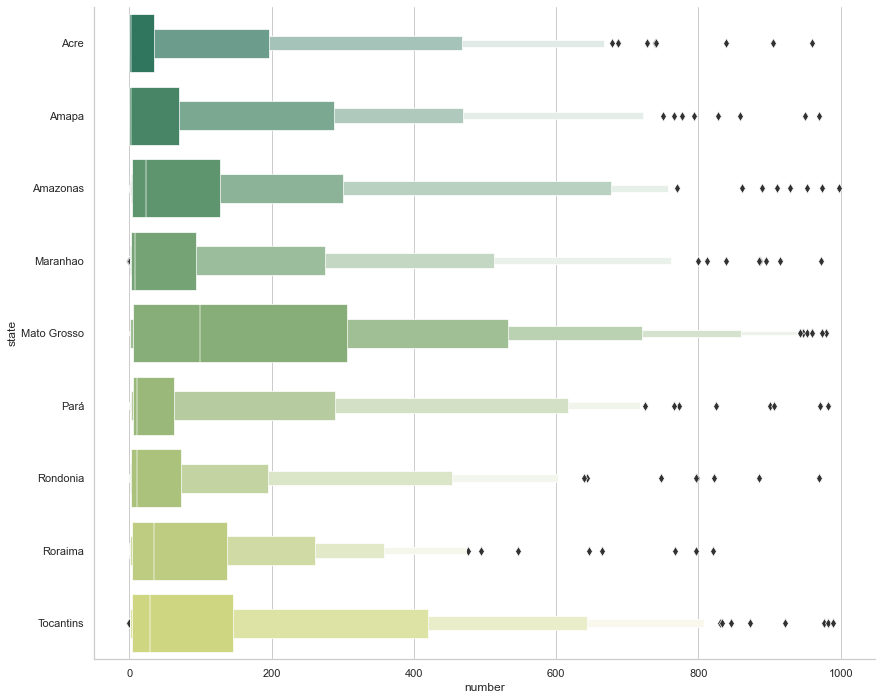

In [13]:
get_boxenplot(df_amazon, 'state')

We see that on average from 1998 to 2017, of the states in the Legal Amazon region, Mato Grosso had the most fires and Acre had the least.

The letter-value plot provides further details. All of the states have medians smaller than their means, which indicates that their data is positively skewed. This suggests that from 1998 to 2017, the vast majority of fires in the Legal Amazon region occurred in relatively small numbers across states in the Legal Amazon region. 

Mato Grosso however has the largest median of all the states and is proportionately closest in value to its mean. This suggests that the skew for Mato Grosso is not as extreme as the other states. Mato Grosso also has the largest interquartile range. This suggests that fires happen in Mato Grosso at higher frequencies than in the other states. 

Roraima has the a small range of values and five outliers quite far from the 97.5 percentile mark. Many of the states show a similar distribution of data. 

In [14]:
# three largest values for Acre
df_amazon[df_amazon.state == 'Acre'].sort_values('number', ascending=False).head(3).style

,year,state,month,number
149,2007,Acre,August,960.000000
197,2015,Acre,October,905.000000
148,2006,Acre,August,839.000000


In [15]:
# three largest values for Amapa
df_amazon[df_amazon.state == 'Amapa'].sort_values('number', ascending=False).head(3).style

,year,state,month,number
693,2012,Amapa,November,969.000000
685,2004,Amapa,November,949.000000
698,2017,Amapa,November,858.000000


In [16]:
# five largest values for Amazonas
df_amazon[df_amazon.state == 'Amazonas'].sort_values('number', ascending=False).head(5).style

,year,state,month,number
888,2008,Amazonas,September,998.000000
929,2009,Amazonas,November,973.000000
914,2014,Amazonas,October,952.000000
882,2002,Amazonas,September,928.000000
884,2004,Amazonas,September,911.000000


In [17]:
# three largest values for Maranhao
df_amazon[df_amazon.state == 'Maranhao'].sort_values('number', ascending=False).head(3).style

,year,state,month,number
2283,2009,Maranhao,July,972.000000
2266,2012,Maranhao,June,915.000000
2293,1999,Maranhao,August,895.000000


In [18]:
# three largest values for Pará
df_amazon[df_amazon.state == 'Pará'].sort_values('number', ascending=False).head(3).style

,year,state,month,number
3229,1999,Pará,July,982.000000
3238,2008,Pará,July,971.000000
3245,2015,Pará,July,906.000000


In [19]:
# three largest values for Rondonia
df_amazon[df_amazon.state == 'Rondonia'].sort_values('number', ascending=False).head(5).style

,year,state,month,number
5158,2016,Rondonia,July,969.000000
5175,2013,Rondonia,August,885.000000
5213,2011,Rondonia,October,822.000000
5147,2005,Rondonia,July,798.000000
5203,2001,Rondonia,October,796.000000


In [20]:
# five largest values for Roraima
df_amazon[df_amazon.state == 'Roraima'].sort_values('number', ascending=False).head(5).style

,year,state,month,number
5303,2002,Roraima,March,820.000000
5288,2007,Roraima,February,796.000000
5284,2003,Roraima,February,767.000000
5308,2007,Roraima,March,665.000000
5282,2001,Roraima,February,646.000000


In [21]:
# three largest values for Tocantins
df_amazon[df_amazon.state == 'Tocantins'].sort_values('number', ascending=False).head(3).style

,year,state,month,number
6346,2009,Tocantins,July,989.000000
6344,2007,Tocantins,July,982.000000
6339,2002,Tocantins,July,976.000000


There do not appear to be obvious commonalities among the outliers.

### The Rest of Brazil

In [22]:
# average number of fires by state in the rest of Brazil in descending order
num_by_state = df_other[['state', 'number']].groupby('state').mean()
num_by_state.reset_index(inplace=True)
num_by_state.sort_values('number', ascending=False).style

,state,number
12,Sao Paulo,213.896226
1,Bahia,187.222703
9,Piau,158.174674
5,Goias,157.721841
6,Minas Gerais,156.800243
2,Ceara,127.314071
7,Paraiba,109.698573
8,Pernambuco,102.502092
11,Santa Catarina,101.924067
10,Rio,62.985865


In [23]:
# sns.histplot(data=df[df.state=='Mato Grosso'], x='number')

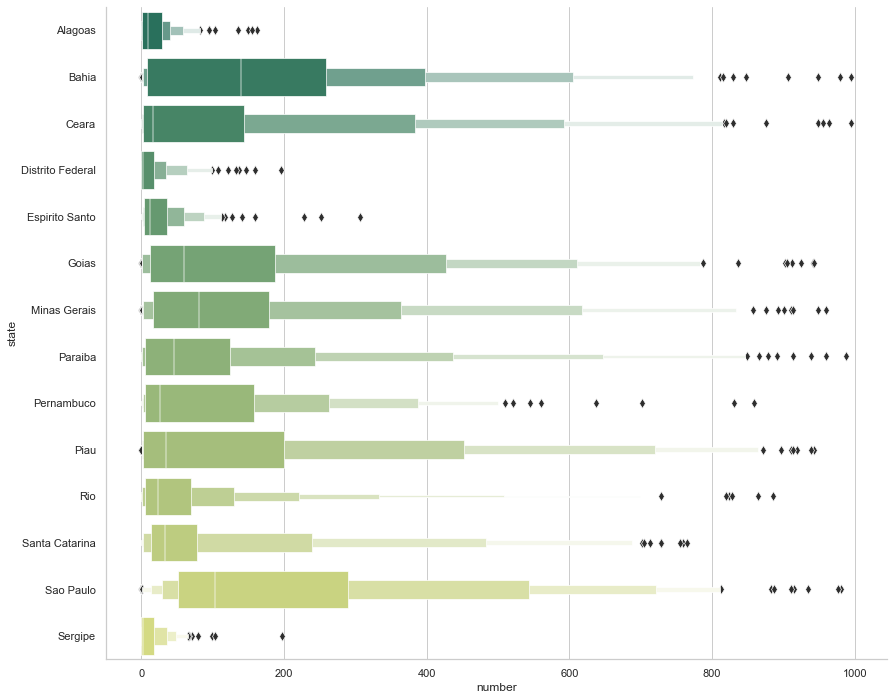

In [24]:
get_boxenplot(df_other, 'state')

From the data, we see that on average from 1998 to 2017, the rest of Brazil had the most fires in Sao Paulo and the least in Sergipe.

Overall, the data distributions of the states here appear to be less skewed than those in the Legal Amazon Region.

## Mann-Whitney U and Kolmogorov-Smirnov Test

As the data is not normally distributed, nonparametric tests should be used to determine if the frequency of fires in the Legal Amazon Region are significantly different from those in the rest of Brazil. 

In [25]:
df_amazon2 = df_amazon.copy()
df_other2 = df_other.copy()

# rank data to use with Mann-Whitney U test
df_amazon2['rank'] = df_amazon2['number'].rank()
df_other2['rank'] = df_other2['number'].rank()

mw_stat, mw_p = mannwhitneyu(df_other2['rank'].values, 
                             df_amazon2['rank'].values)

# two-sample Kolmogorov-Smirnov test
ks_stat, ks_p = ks_2samp(df_other2.number.values, 
                         df_amazon2.number.values, 
                         mode='auto')

print("Mann-Whitney U statistic: {:.2f}  p-value: {:.4f}".format(mw_stat, mw_p))
print("Kolmogorov-Smirnov statistic: {:.2f}  p-value: {:.4f}".format(ks_stat, ks_p))

Mann-Whitney U statistic: 6863645.00  p-value: 0.0000
Kolmogorov-Smirnov statistic: 0.10  p-value: 0.0000


The results of the two tests indicate that there is a significant difference in frequency of fires in the Legal Amazon Region and the rest of Brazil.

## Data Analysis: Year

In [26]:
# average number of fires per year in the Legal Amazon Region in descending order
num_by_year_a = df_amazon[['year', 'number']].groupby('year').mean()
num_by_year_a.reset_index(inplace=True)
num_by_year_a.sort_values('number', ascending=False).head().style

,year,number
17,2015,160.406400
11,2009,157.191258
5,2003,149.457483
16,2014,146.303283
12,2010,143.035183


In [27]:
# average number of fires per year in the rest of Brazil in descending order
num_by_year_r = df_other[['year', 'number']].groupby('year').mean()
num_by_year_r.reset_index(inplace=True)
num_by_year_r.sort_values('number', ascending=False).head().style

,year,number
18,2016,124.820559
5,2003,121.694980
19,2017,118.438394
14,2012,115.566471
6,2004,109.050696


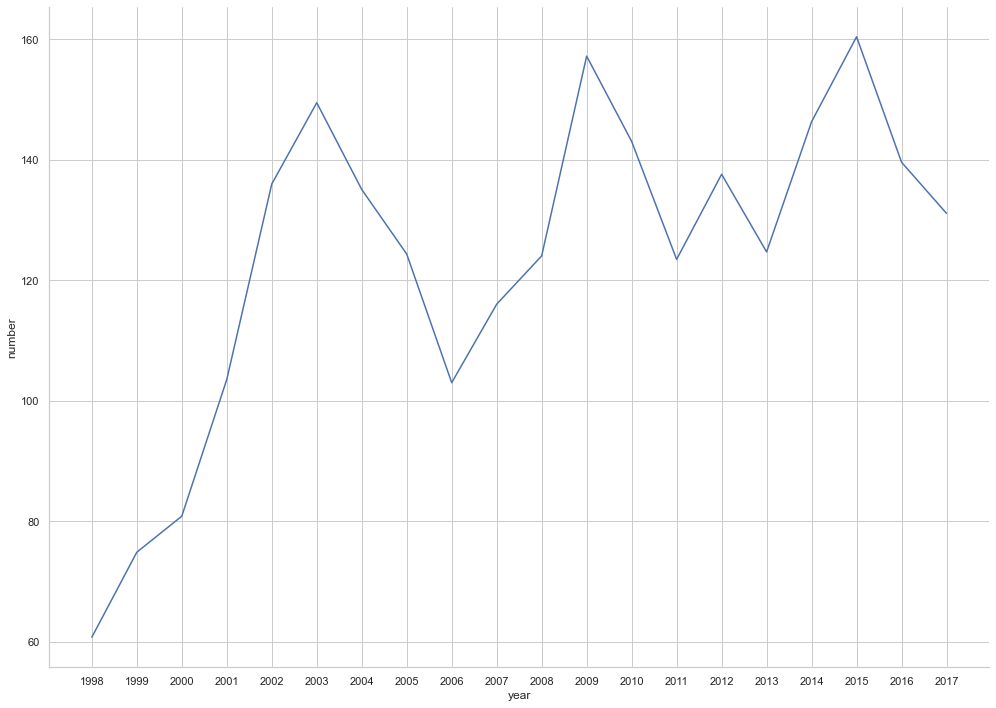

In [28]:
# average number of fires per year in the Legal Amazon Region
lplot_year_a = sns.relplot(x="year", y="number",
                           kind="line", ci=None,
                           data=df_amazon, height=10, 
                           aspect=1.4).set(xticks=list(range(1998,2018)))

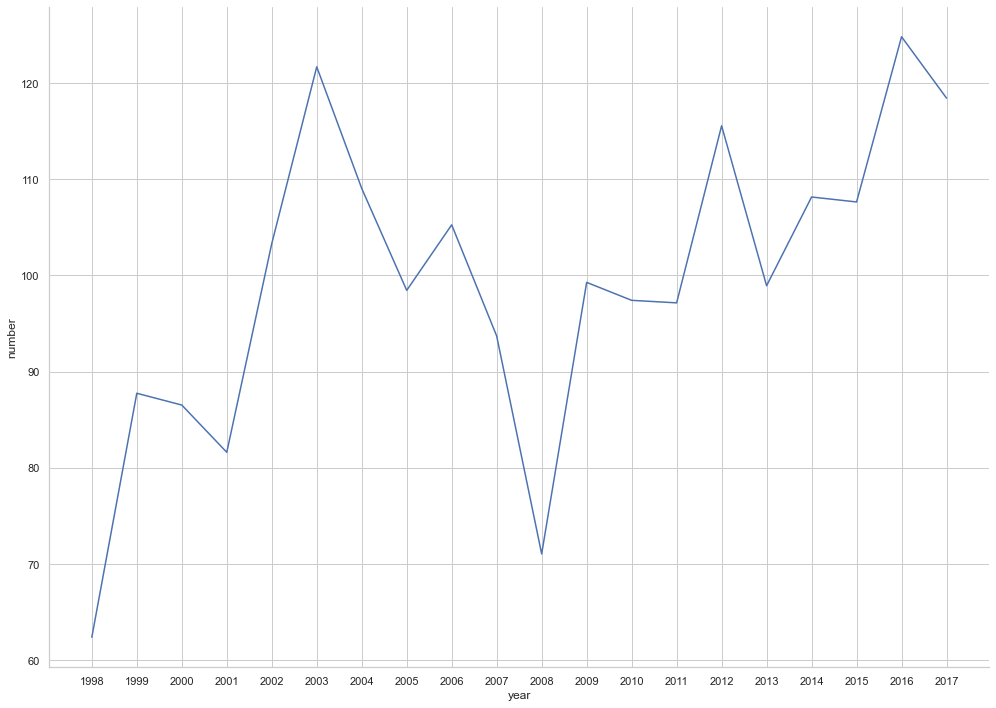

In [29]:
# average number of fires per year in the rest of Brazil
lplot_year_r = sns.relplot(x="year", y="number",
                           kind="line", ci=None,
                           data=df_other, height=10,
                           aspect=1.4).set(xticks=list(range(1998,2018)))

We can see that the average number of fires per year in the Legal Amazon Region and the rest of Brazil has increased over the 20 year period (1998-2017). However, this trend is more obvious and consistent in the Legal Amazon Region than in the rest of Brazil.

The mean number of fires per year is higher in the Legal Amazon Region than in the rest of Brazil.

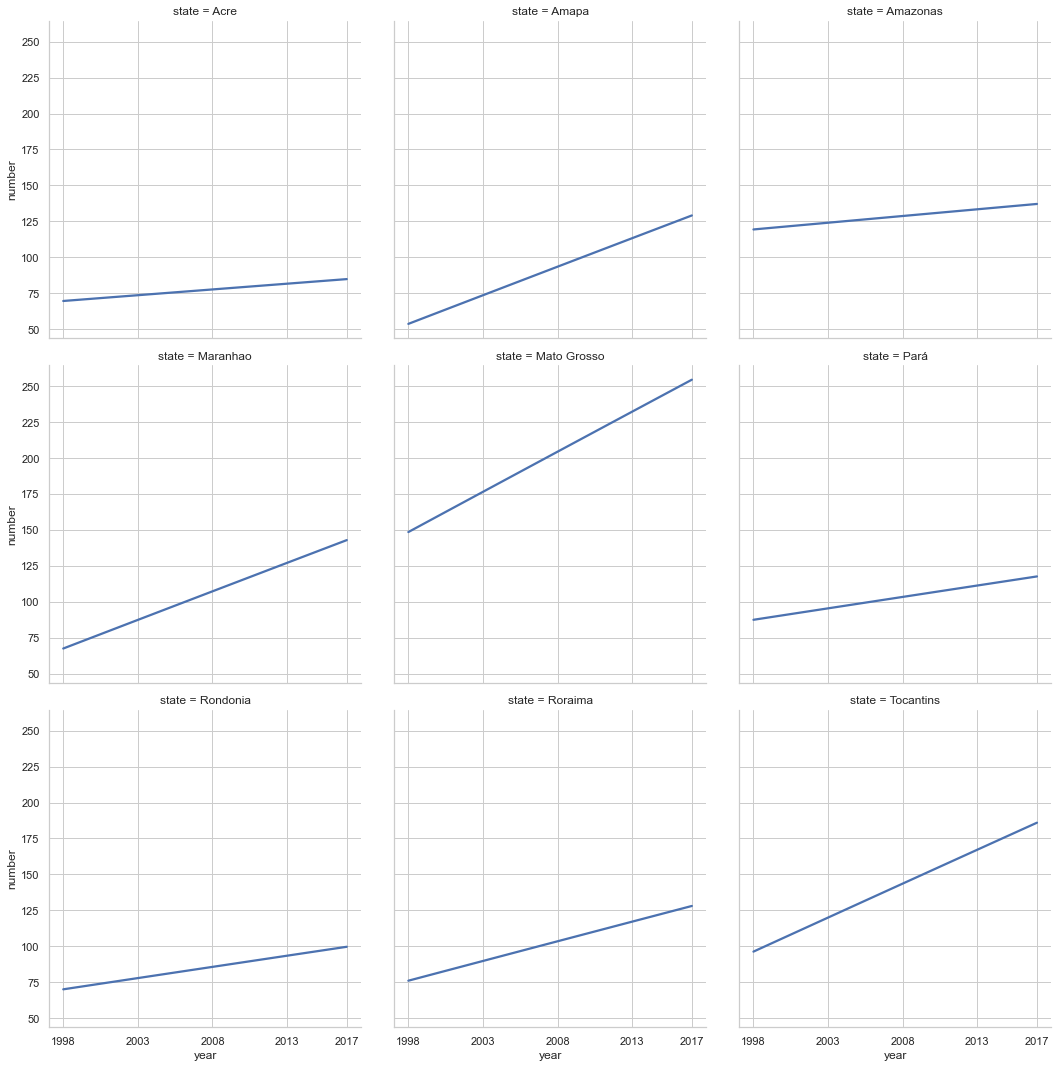

In [30]:
# # average number of fires per month by state
# lplot_year_state = sns.relplot(x='year', y='number',
#                                hue='state', kind='line',
#                                ci=None, height=8, aspect=1.4,
#                                data=df, palette="tab20c").set(xticks=list(range(1998,2018)))

# log adjusted trend in number of fires in the Legal Amazon Region per year by state
lplot_year_state = sns.lmplot(x="year", y="number",
                              col="state", col_wrap=3,
                              logx=True, scatter=False,
                              ci=None, data=df_amazon).set(xticks=[
                              1998, 2003, 2008, 2013, 2017])

When examining the log adjusted linear regression plot for number of fires in the Legal Amazon Region, we can see that all the states show an increasing trend, except for Amazonas, which shows almost no change.

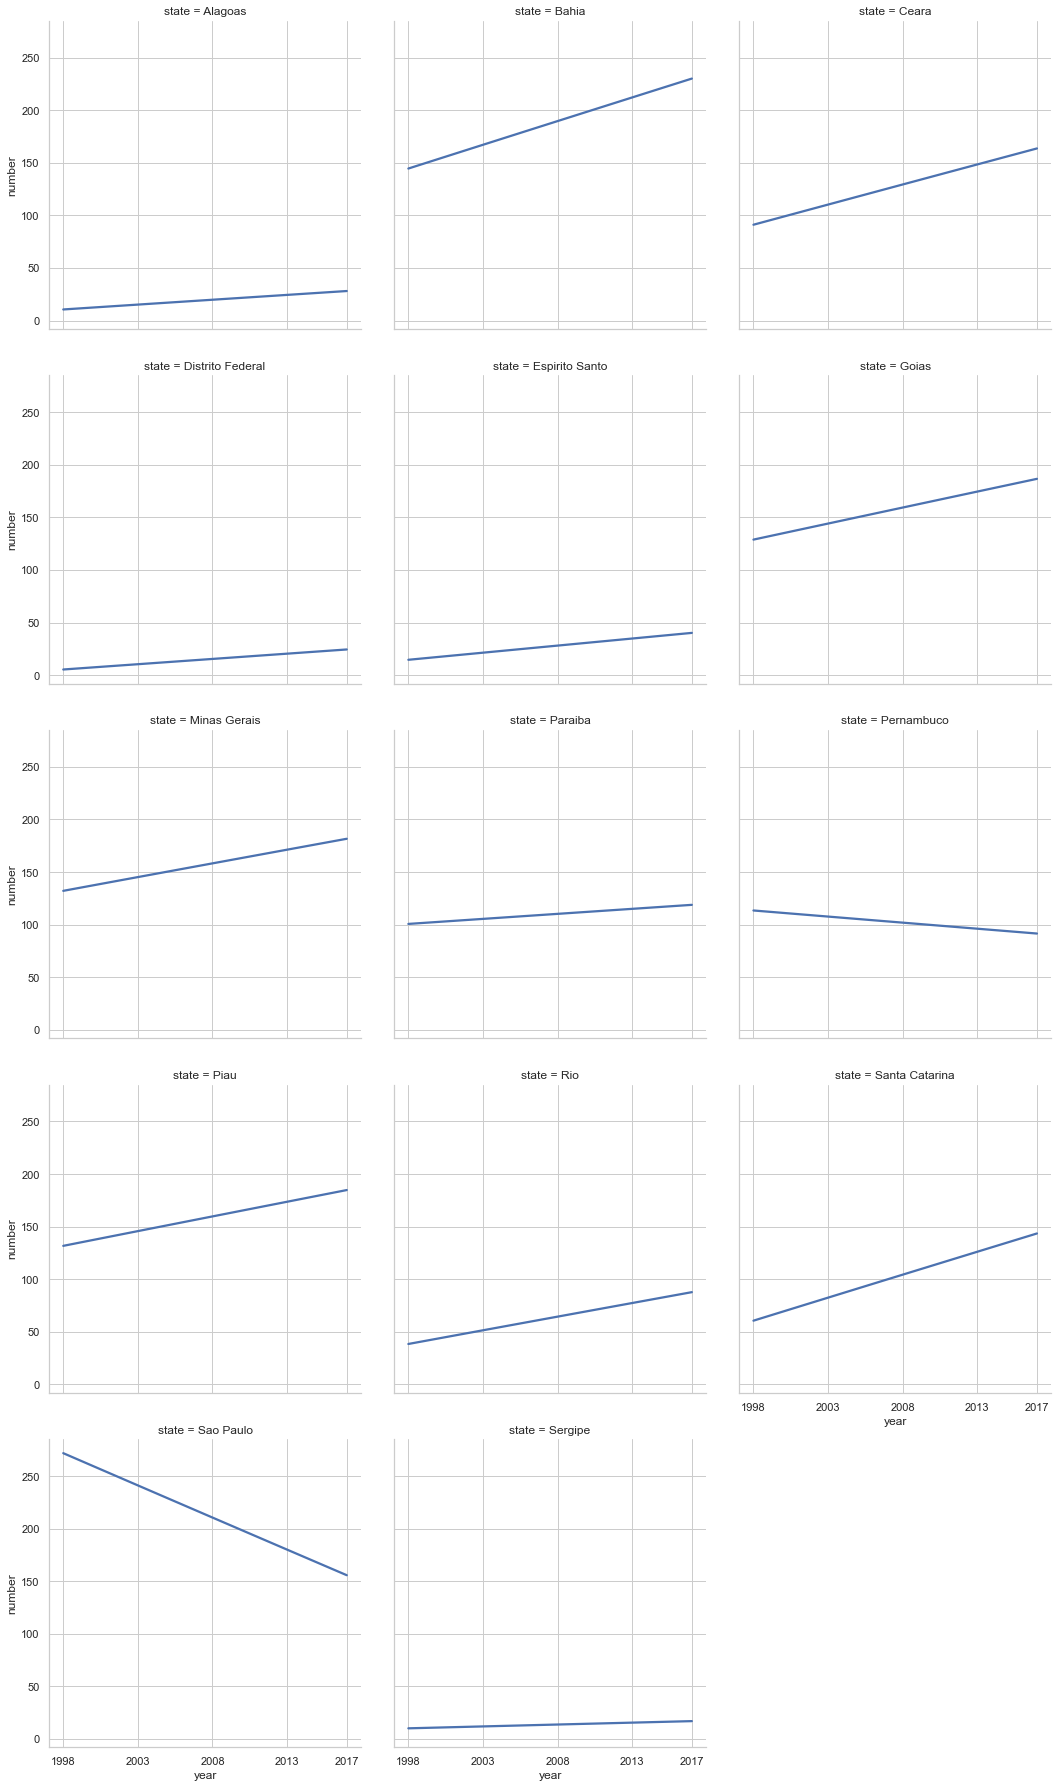

In [31]:
# log adjusted trend in number of fires in the rest of Brazil per year by state
lplot_year_state = sns.lmplot(x="year", y="number",
                              col="state", col_wrap=3,
                              logx=True, scatter=False,
                              ci=None, data=df_other).set(xticks=[
                              1998, 2003, 2008, 2013, 2017])

When examining the log adjusted linear regression plot for number of fires in the rest of Brazil, we can see that the trends for the states are more varied than those in the Legal Amazon Region.

While most of the states show an increasing trend, Sao Paulo and Pernambuco show a decreasing trend, and Sergipe, Alagopas and Paraiba show almost no change.

## Conclusion

Given the analyses above, I believe there is evidence to suggest that the number of fires in the Legal Amazon Region has increased in the 20 year period from 1998 and 2017. This trend is not consistently reflected in the rest of Brazil. Spikes in fire frequency occur at different times of the year in the Legal Amazon Region from the rest of Brazil. The results of the nonparametric tests suggest that the frequency of fires in the Legal Amazon Region is significantly different from that in the rest of Brazil.

<!-- Examining the average number of fires per month by state, we can see that more fires occur during certain month/s.
- Acre: August and October
- Amapa: October
- Amazonas: October, November
- Maranhao: June
- Mato Grosso: May, October
- Pará: July
- Rodonia: July
- Roraima: February
- Tocantins: June and July

It appears that in the Legal Amazon region, more fires tend to occur between July and October. This may be due to the slash and burn activities that occur during these months.

According to [Wikipedia](https://en.wikipedia.org/wiki/2019_Amazon_rainforest_wildfires)
> ...huge amounts of biomass are removed by first pulling down the trees in the Amazon using bulldozers and giant tractors during the wet season (November through June), followed by torching the tree trunks several months later in the dry season (July through October). -->